In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# Disable scientific notation for large numbers
pd.options.display.float_format = '{:.0f}'.format

# Setting display options for Pandas to show three decimal places for floating-point numbers
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Data Loading

In [2]:
# import data
sales_df = pd.read_csv('/content/drive/MyDrive/Global_Superstore.csv', encoding='ISO-8859-1')

# Data Exploration

In [3]:
sales_df.info() # Display information about the DataFrame, including data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [4]:
sales_df.head() # Display top 5 records

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.65,7,0.00,762.18,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.39,9,0.10,-288.76,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.10,919.97,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.10,-96.54,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.00,311.52,903.04,Critical


In [5]:
sales_df[['Sales','Quantity','Discount','Profit','Shipping Cost']].describe() # Display statistical information about Dataframe

,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00,51290.00,51290.00,51290.00,51290.00
mean,246.49,3.48,0.14,28.61,26.38
std,487.57,2.28,0.21,174.34,57.30
min,0.44,1.00,0.00,-6599.98,0.00
25%,30.76,2.00,0.00,0.00,2.61
50%,85.05,3.00,0.00,9.24,7.79
75%,251.05,5.00,0.20,36.81,24.45
max,22638.48,14.00,0.85,8399.98,933.57


In [6]:
sales_df.isna().sum() # Find sum of missing values

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
City,0
State,0


In [7]:
sales_df.fillna(0,inplace=True) # Replace missing values with 0

In [8]:
sales_df.isna().sum() # Find sum of missing values after cleaning

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
City,0
State,0


In [9]:
print(sales_df.duplicated().sum()) # Find sum of duplicate records

0


Since, sum of duplicated values is zero, so there is no need to drop duplicates.

In [10]:
# Convert date column to datetime
sales_df['Order Date'] = pd.to_datetime(sales_df['Order Date'])
sales_df['Ship Date'] = pd.to_datetime(sales_df['Ship Date'])

/tmp/ipython-input-10-1068123818.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  sales_df['Order Date'] = pd.to_datetime(sales_df['Order Date'])
/tmp/ipython-input-10-1068123818.py:3: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  sales_df['Ship Date'] = pd.to_datetime(sales_df['Ship Date'])


In [11]:
sales_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.65,7,0.00,762.18,933.57,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.39,9,0.10,-288.76,923.63,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.10,919.97,915.49,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.10,-96.54,910.16,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.00,311.52,903.04,Critical


In [12]:
# Save cleaned data
sales_df.to_csv('/content/drive/MyDrive/Global_Superstore_final.csv', index=False)

# Data Visualization

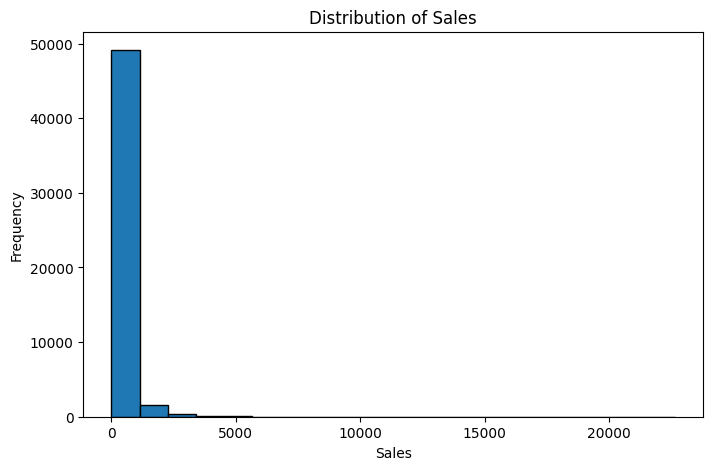

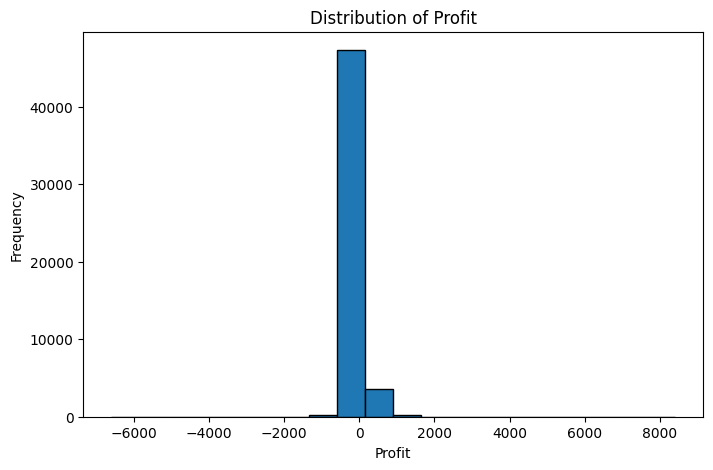

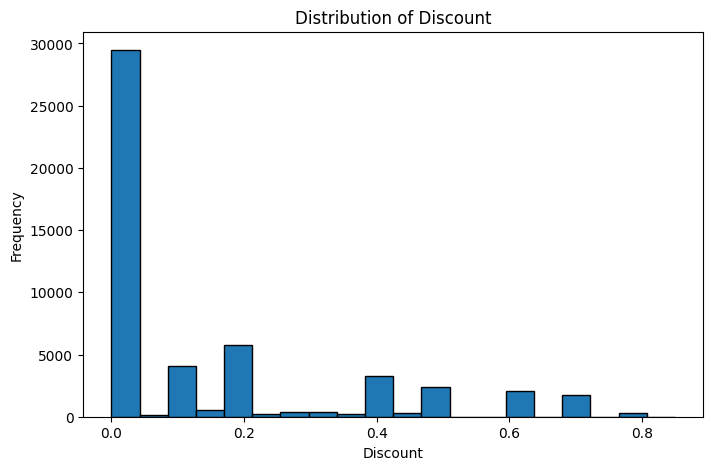

In [13]:
# Explore distributions of numerical data
# List of numerical columns to be explored
num_cols = ['Sales', 'Profit', 'Discount']

# Create histograms for each numerical column
for col in num_cols:
    plt.figure(figsize=(8, 5))
    sales_df[col].hist(bins=20, edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(False)
    plt.show()

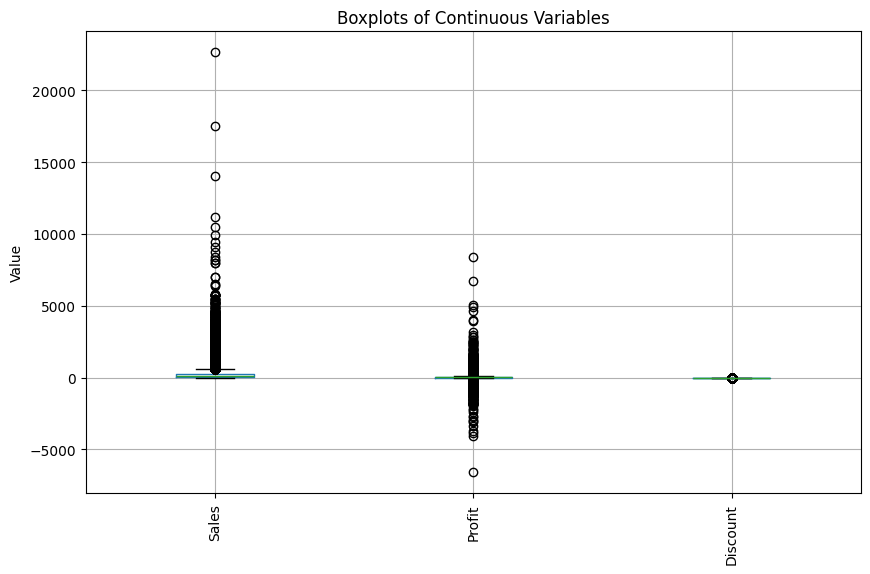

In [14]:
# Identify outliers in continuous variables
# List of continuous (numerical) columns
continuous_cols = ['Sales', 'Profit', 'Discount']

# Create boxplots for each continuous variable
plt.figure(figsize=(10, 6))
sales_df[continuous_cols].boxplot()
plt.title('Boxplots of Continuous Variables')
plt.ylabel('Value')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


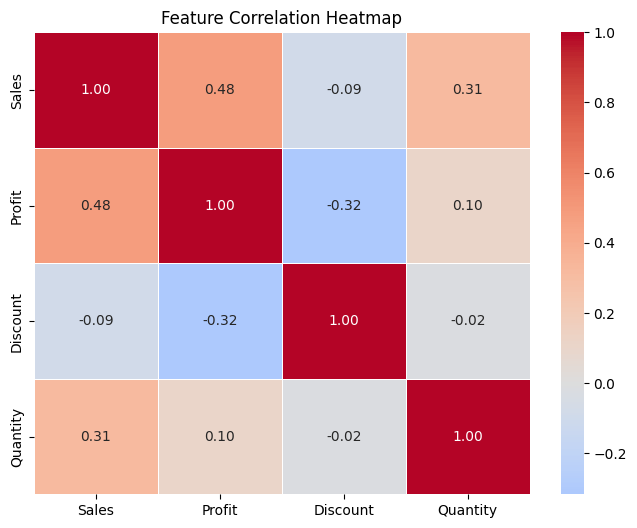

In [15]:
# Visualize correlations and relationships between features
# Select numerical columns for correlation analysis
num_cols = ['Sales', 'Profit', 'Discount', 'Quantity']

# Calculate the correlation matrix
corr_matrix = sales_df[num_cols].corr()

# Create the heatmap
plt.figure(figsize=(8, 6))
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

In [16]:
# Remove outliers using IQR method
#Q1 = sales_df.quantile(0.25)
#Q3 = sales_df.quantile(0.75)
#IQR = Q3 - Q1
# Filter dataframe to keep only rows within 1.5*IQR range for all numerical columns
#sales_df_clean = sales_df[~((sales_df < (Q1 - 1.5 * IQR)) | (sales_df > (Q3 + 1.5 * IQR))).any(axis=1)]


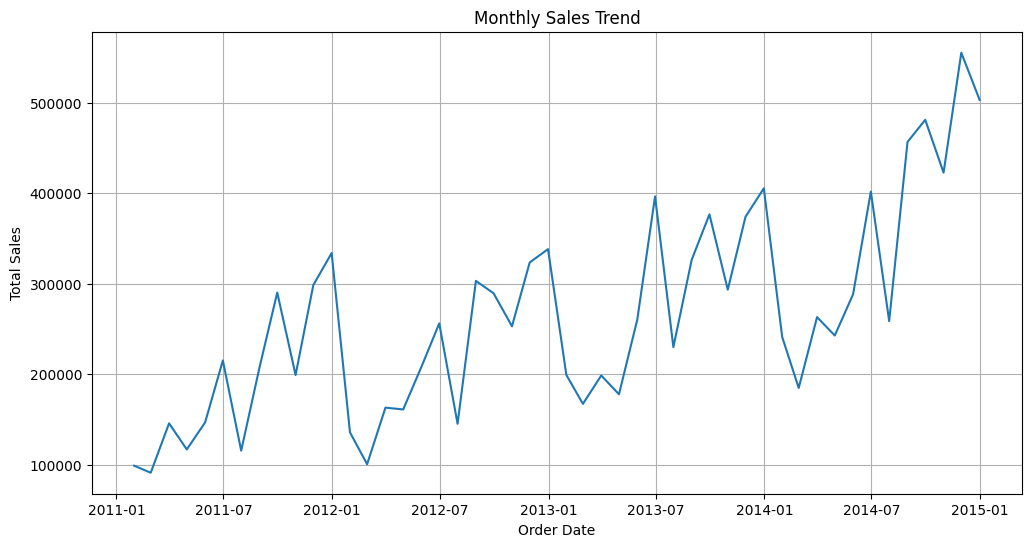

In [17]:
# Observe trends in Sales over time.
plt.figure(figsize=(12, 6))
#sales_df.groupby('Order Date')['Sales'].sum().plot(kind='line', marker='o')
trend_data = sales_df.groupby(pd.Grouper(key='Order Date', freq='ME'))['Sales'].sum()
sb.lineplot(x=trend_data.index, y=trend_data.values)
plt.title('Monthly Sales Trend')
plt.xlabel('Order Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

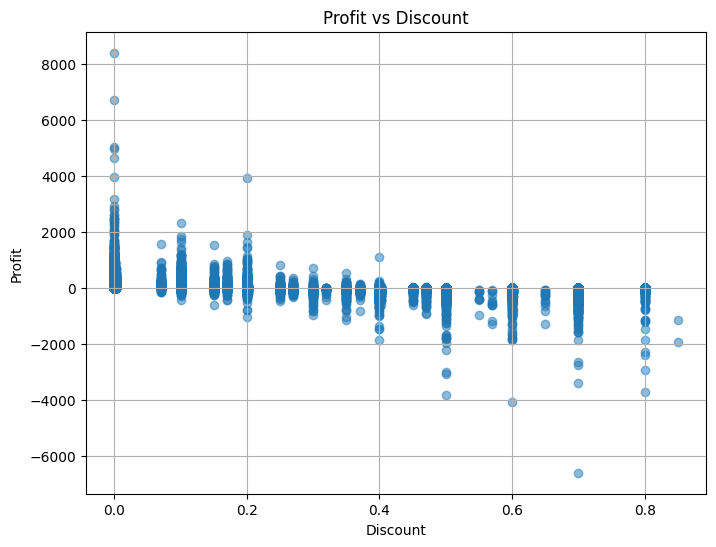

In [25]:
# Relationship between Profit and Discount
plt.figure(figsize=(8, 6))
plt.scatter(sales_df['Discount'], sales_df['Profit'], alpha=0.5)
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.title('Profit vs Discount')
plt.grid(True)
plt.show()

Visualize sales distribution by Region and Category

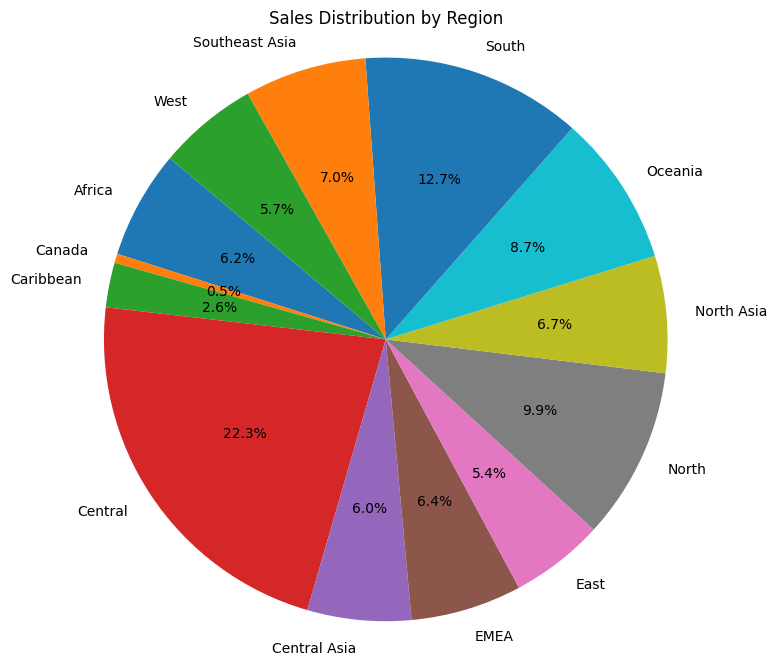

In [19]:
# Plot pie chart of sales distribution by Region
region_sales = sales_df.groupby('Region')['Sales'].sum()
plt.figure(figsize=(8, 8))
plt.pie(region_sales, labels=region_sales.index, autopct='%1.1f%%', startangle=140)
plt.title('Sales Distribution by Region')
plt.axis('equal')
plt.show()

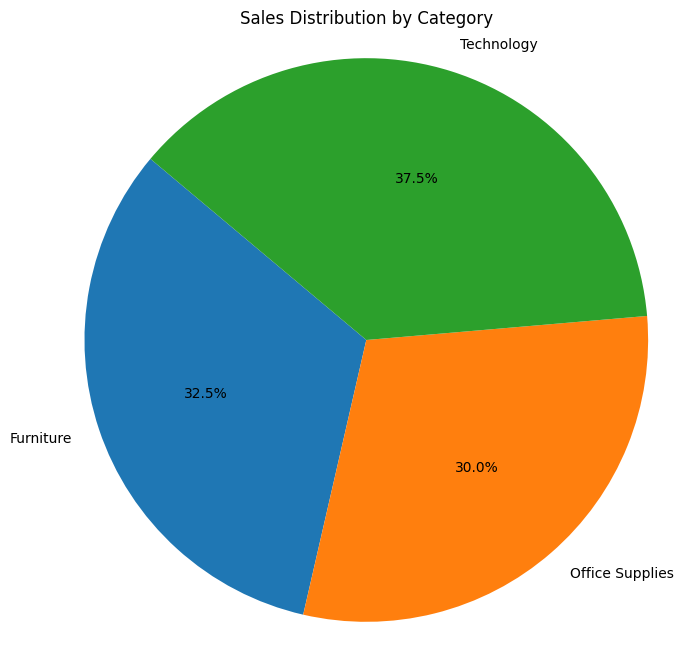

In [20]:
# Plot pie chart of sales distribution by Category
category_sales = sales_df.groupby('Category')['Sales'].sum()
plt.figure(figsize=(8, 8))
plt.pie(category_sales, labels=category_sales.index, autopct='%1.1f%%', startangle=140)
plt.title('Sales Distribution by Category')
plt.axis('equal')
plt.show()

Train a Linear Regression Model and evaluate model performance

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [22]:
# Feature Engineering
X = sales_df[['Profit', 'Discount']]
y = sales_df['Sales']

# Split data (training data 80% test data 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train model
model = LinearRegression()
model.fit(X_train, y_train)

# Generate predictions
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print model performance
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 187787.80
R-squared: 0.16
